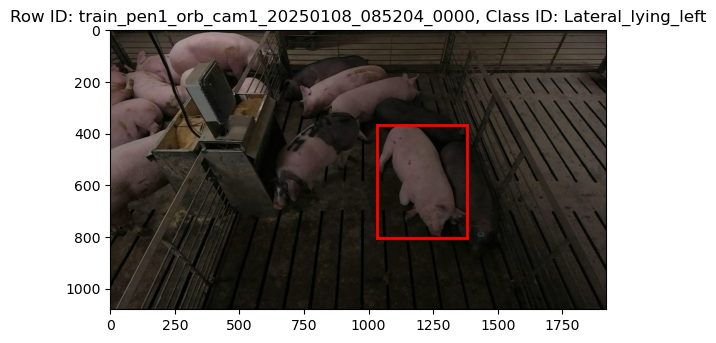

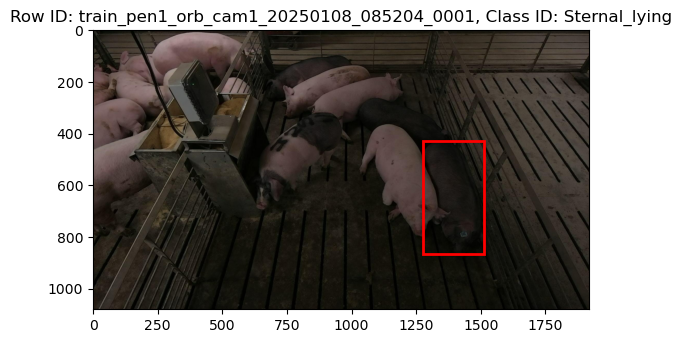

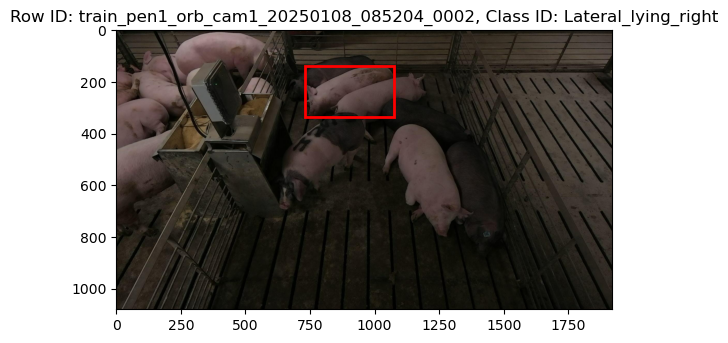

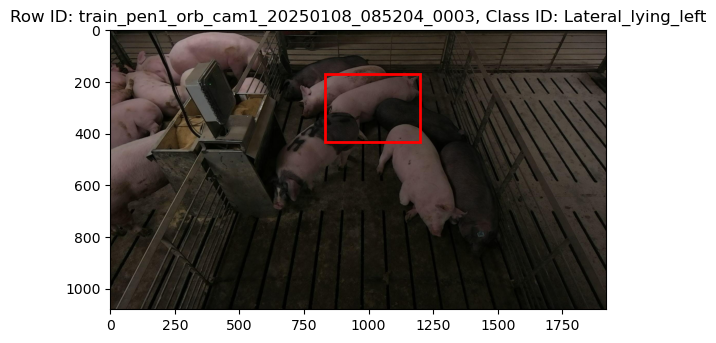

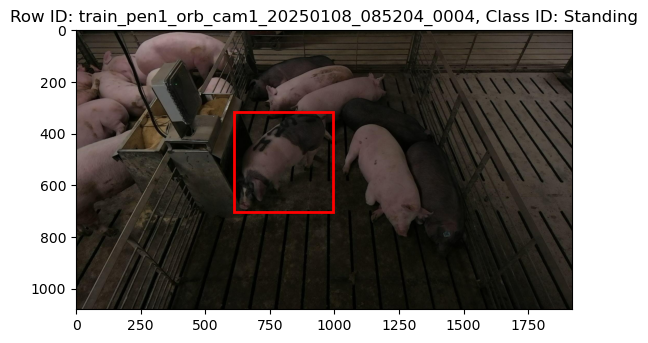

In [7]:
# data paths
train1_path = "/datasets/multi-view-pig-posture-recognition/train1_images"
train2_path = "/datasets/multi-view-pig-posture-recognition/train2_images"
test_path = "/datasets/multi-view-pig-posture-recognition/test_images"
# csv path with row_id, image_id, width, height, bbox, class_id
train1_csv = "/datasets/multi-view-pig-posture-recognition/train1.csv"
train2_csv = "/datasets/multi-view-pig-posture-recognition/train2.csv"
test_csv = "/datasets/multi-view-pig-posture-recognition/test.csv"
# pig posture classes
pig_posture_classes = {
    0: "Lateral_lying_left",
    1: "Lateral_lying_right",
    2: "Sitting",
    3: "Standing",
    4: "Sternal_lying"
}

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
train1 = pd.read_csv(train1_csv)
train2 = pd.read_csv(train2_csv)
test = pd.read_csv(test_csv)
#show the first 5 rows of train1 paired with their images and their bboxes drawn on the images
for i in range(5):
    row = train1.iloc[i]
    image_id = row["image_id"]
    image_path = f"{train1_path}/{image_id}"
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f"Row ID: {row['row_id']}, Class ID: {pig_posture_classes[row['class_id']]}")
    # draw the bbox on the image
    bbox = eval(row["bbox"])
    x, y, w, h = bbox
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2))
    plt.show()

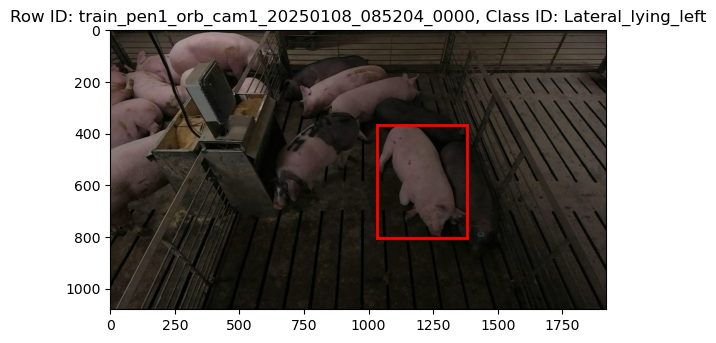

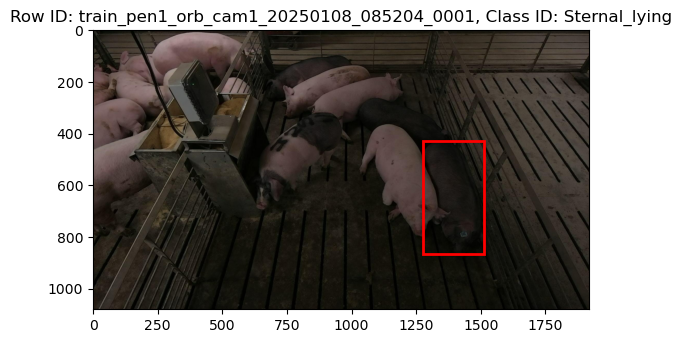

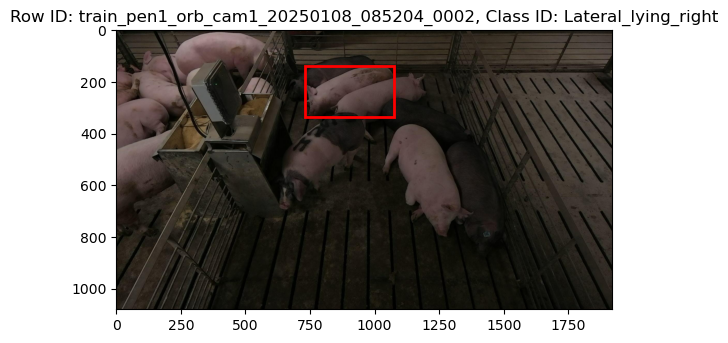

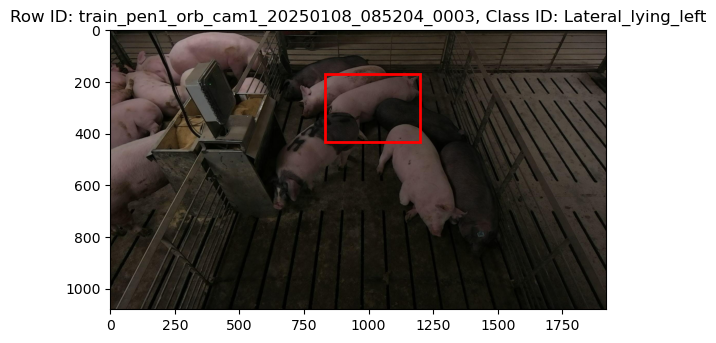

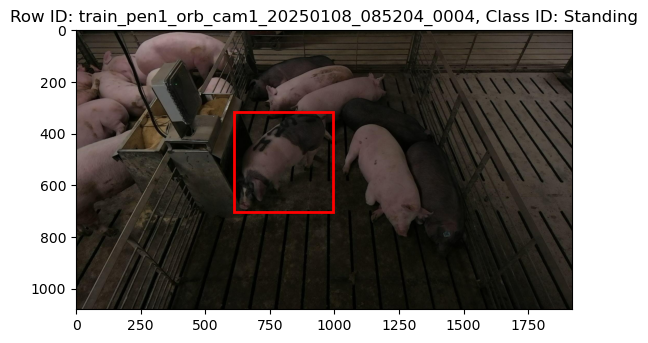

In [8]:
#show the first 5 rows of train2 paired with their images and their bboxes drawn on the images
for i in range(5):
    row = train2.iloc[i]
    image_id = row["image_id"]
    image_path = f"{train2_path}/{image_id}"
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f"Row ID: {row['row_id']}, Class ID: {pig_posture_classes[row['class_id']]}")
    # draw the bbox on the image
    bbox = eval(row["bbox"])
    x, y, w, h = bbox
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2))
    plt.show()

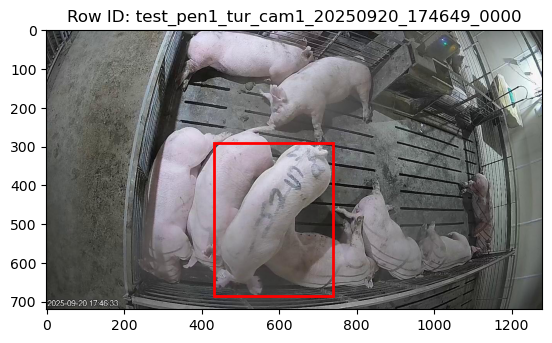

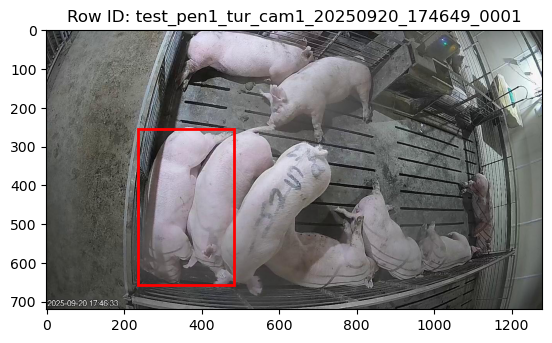

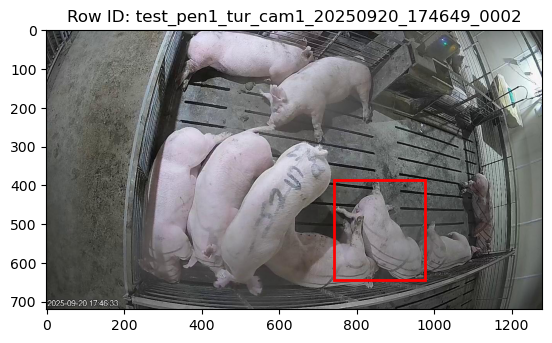

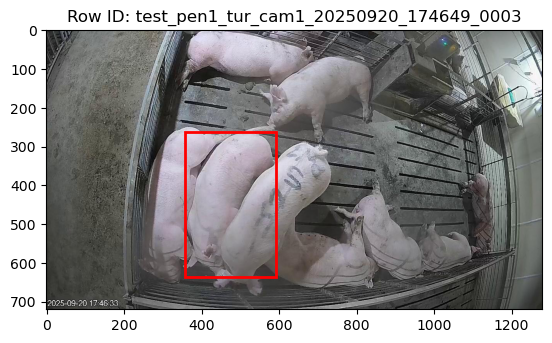

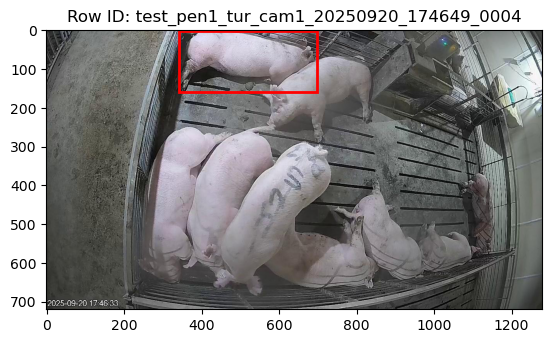

In [11]:
for i in range(5):
    row = test.iloc[i]
    image_id = row["image_id"]
    image_path = f"{test_path}/{image_id}"
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f"Row ID: {row['row_id']}")
    # draw the bbox on the image
    bbox = eval(row["bbox"])
    x, y, w, h = bbox
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2))
    plt.show()

In [17]:
# all columns in train1 and train2 and test	
print("Train1 columns:", train1.columns.tolist())
print("Train2 columns:", train2.columns.tolist())
print("Test columns:", test.columns.tolist())


Train1 columns: ['row_id', 'image_id', 'width', 'height', 'bbox', 'class_id']
Train2 columns: ['row_id', 'image_id', 'width', 'height', 'bbox', 'class_id']
Test columns: ['row_id', 'image_id', 'width', 'height', 'bbox']


/opt/conda/envs/torch/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


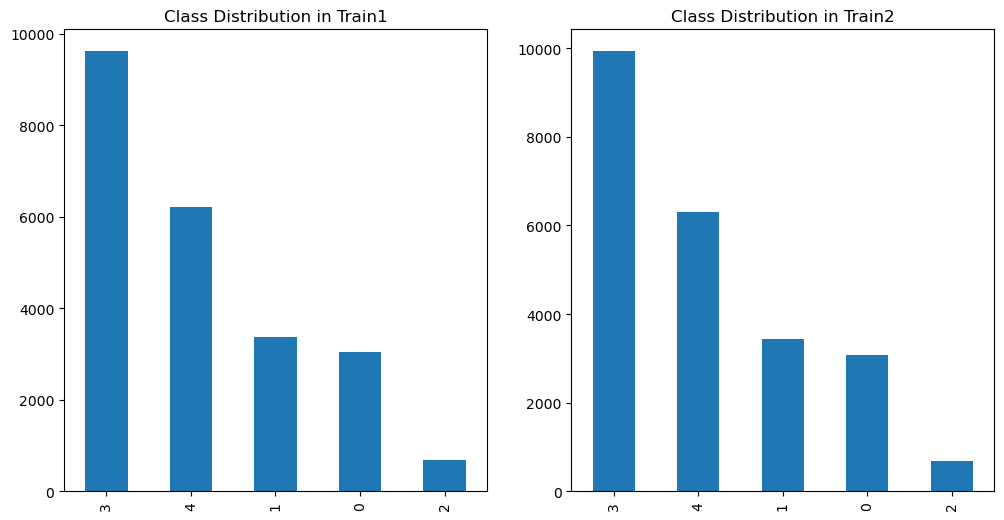

In [12]:
# show the distribution of class_id in train1 and train2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train1["class_id"].value_counts().plot(kind="bar")
plt.title("Class Distribution in Train1")
plt.subplot(1, 2, 2)
train2["class_id"].value_counts().plot(kind="bar")
plt.title("Class Distribution in Train2")
plt.show()

-> Entspricht der Verteilung, die auf Kaggle genannt wird

In [13]:
# number of unique images in train1 and train2
print(f"Number of unique images in train1: {train1['image_id'].nunique()}")
print(f"Number of unique images in train2: {train2['image_id'].nunique()}")


Number of unique images in train1: 3090
Number of unique images in train2: 3150


-> entspricht, dem was auf Kaggle genannt wird -> korrekte Anzahl an Bildern eingelesen

/opt/conda/envs/torch/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


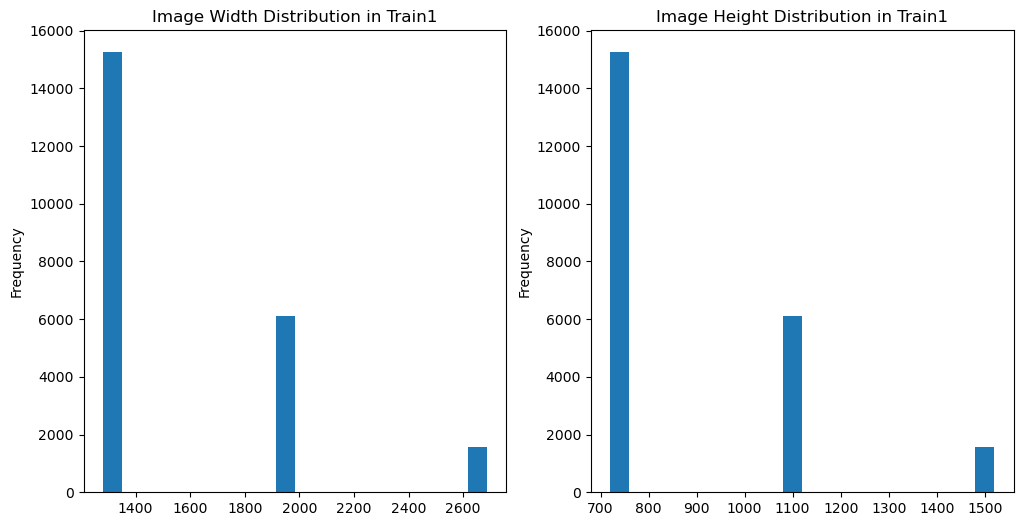

/opt/conda/envs/torch/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


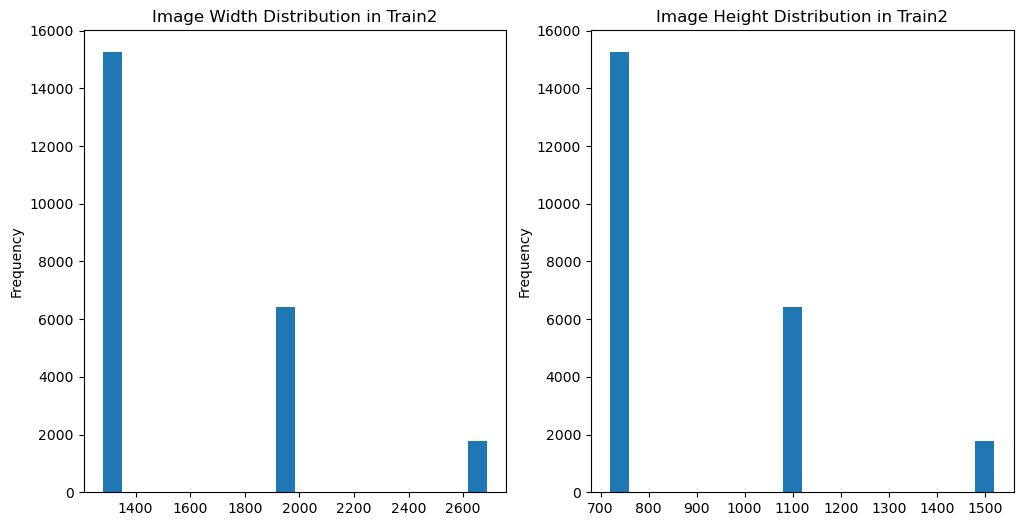

In [14]:
# show the distribution of image sizes in train1 and train2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train1["width"].plot(kind="hist", bins=20)
plt.title("Image Width Distribution in Train1")
plt.subplot(1, 2, 2)
train1["height"].plot(kind="hist", bins=20)
plt.title("Image Height Distribution in Train1")
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train2["width"].plot(kind="hist", bins=20)
plt.title("Image Width Distribution in Train2")
plt.subplot(1, 2, 2)
train2["height"].plot(kind="hist", bins=20)
plt.title("Image Height Distribution in Train2")
plt.show()


-> es gibt unterschiedliche Bildgrößen in den Trainingsdaten

/opt/conda/envs/torch/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


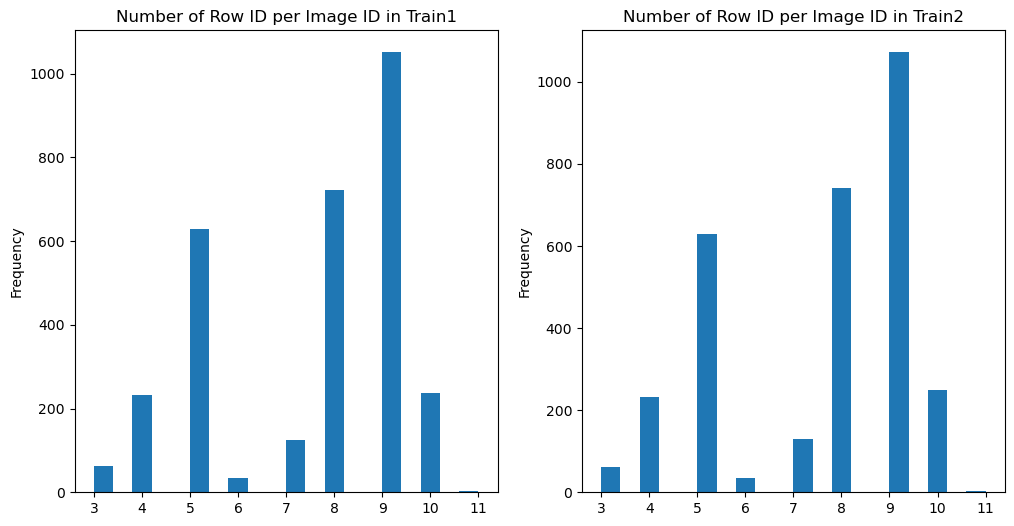

In [16]:
# show distribution of number of row_id per image_id in train1 and train2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train1.groupby("image_id")["row_id"].count().plot(kind="hist", bins=20)
plt.title("Number of Row ID per Image ID in Train1")
plt.subplot(1, 2, 2)
train2.groupby("image_id")["row_id"].count().plot(kind="hist", bins=20)
plt.title("Number of Row ID per Image ID in Train2")
plt.show()


"Each pen contains 8 to 10 pigs per batch"
-> kann so nicht validiert werden. es gibt images mit 3-10 Schweinen? 
-> Fehlersucher: doch falsch eingelesen? Verständnis von row_id oder image_id falsch? 

In [19]:
# show images where number of row_id per image_id is less than 8 in train1 and train2
train1_less_than_8 = train1.groupby("image_id")["row_id"].count()[train1.groupby("image_id")["row_id"].count() < 8]
train2_less_than_8 = train2.groupby("image_id")["row_id"].count()[train2.groupby("image_id")["row_id"].count() < 8]
print(f"Number of images with less than 8 row_id in train1: {len(train1_less_than_8)}")
print(f"Number of images with less than 8 row_id in train2: {len(train2_less_than_8)}")

Number of images with less than 8 row_id in train1: 1080
Number of images with less than 8 row_id in train2: 1087


"Each pen contains 8 to 10 pigs per batch" scheint sich auf pen zu beziehen, nicht auf image_id. Es könnte also sein, dass mehrere images zu einem pen gehören und die Anzahl der row_id pro pen zwischen 8 und 10 liegt
File name setzt sich so zusammen:
Filename Pattern
Image filenames follow the pattern:

pen-number_camera-type_camera-number_date_time_instance-id.file-extension
Example:

pen1_orb_cam1_20250108_085204.jpg
Filename Components
Component	Description
pen-number	Pig pen identifier (e.g., pen1, pen2)
camera-type	Camera model (orb = Orbbec, tur = Turret)
camera-number	Camera index (e.g., cam1, cam2)
date_time	Capture timestamp in YYYYMMDD_HHMMSS format
file-extension	Image file format (e.g., .jpg)

Note: Bounding box coordinates are provided in absolute pixel units relative to the original image resolution and are not normalized.

-> pen number müsste aus dem filename extrahiert werden, um die Anzahl der row_id pro pen zu validieren. Es könnte sein, dass mehrere images zu einem pen gehören und die Anzahl der row_id pro pen zwischen 8 und 10 liegt. 

In [20]:
# add columns in train1 and train2 for pen_number, camera_type, camera_number, date_time
train1["pen_number"] = train1["image_id"].apply(lambda x: x.split("_")[0])
train1["camera_type"] = train1["image_id"].apply(lambda x: x.split("_")[1])
train1["camera_number"] = train1["image_id"].apply(lambda x: x.split("_")[2])
train1["date_time"] = train1["image_id"].apply(lambda x: x.split("_")[3] + "_" + x.split("_")[4].split(".")[0])
train2["pen_number"] = train2["image_id"].apply(lambda x: x.split("_")[0])
train2["camera_type"] = train2["image_id"].apply(lambda x: x.split("_")[1])
train2["camera_number"] = train2["image_id"].apply(lambda x: x.split("_")[2])
train2["date_time"] = train2["image_id"].apply(lambda x: x.split("_")[3] + "_" + x.split("_")[4].split(".")[0])


In [23]:
train1.head()

row_id  \
0  train_pen1_orb_cam1_20250108_085204_0000   
1  train_pen1_orb_cam1_20250108_085204_0001   
2  train_pen1_orb_cam1_20250108_085204_0002   
3  train_pen1_orb_cam1_20250108_085204_0003   
4  train_pen1_orb_cam1_20250108_085204_0004   

                            image_id  width  height  \
0  pen1_orb_cam1_20250108_085204.jpg   1920    1080   
1  pen1_orb_cam1_20250108_085204.jpg   1920    1080   
2  pen1_orb_cam1_20250108_085204.jpg   1920    1080   
3  pen1_orb_cam1_20250108_085204.jpg   1920    1080   
4  pen1_orb_cam1_20250108_085204.jpg   1920    1080   

                         bbox  class_id pen_number camera_type camera_number  \
0  [1031.5,368.0,349.0,435.0]         0       pen1         orb          cam1   
1  [1278.5,428.0,233.0,438.0]         4       pen1         orb          cam1   
2   [732.0,137.5,342.0,198.0]         1       pen1         orb          cam1   
3   [830.0,169.0,370.0,263.0]         0       pen1         orb          cam1   
4   [611.5,314.8,381.5,386.6]         3       pen1         orb          cam1   

         date_time  
0  20250108_085204  
1  20250108_085204  
2  20250108_085204  
3  20250108_085204  
4  20250108_085204

In [26]:
# show unique values for pen_number, camera_type, camera_number in train1 and train2
print("Train1 unique pen numbers:", train1["pen_number"].unique())
print("Train1 unique camera types:", train1["camera_type"].unique())
print("Train1 unique camera numbers:", train1["camera_number"].unique())
print("Train2 unique pen numbers:", train2["pen_number"].unique())
print("Train2 unique camera types:", train2["camera_type"].unique())
print("Train2 unique camera numbers:", train2["camera_number"].unique())

Train1 unique pen numbers: ['pen1' 'pen2']
Train1 unique camera types: ['orb' 'tur']
Train1 unique camera numbers: ['cam1' 'cam2']
Train2 unique pen numbers: ['pen1' 'pen2']
Train2 unique camera types: ['orb' 'tur']
Train2 unique camera numbers: ['cam1' 'cam2']


In [28]:
# show unique values with counts for pen_number, camera_type, camera_number in train1 and train2
print("Train1 pen number counts:", train1["pen_number"].value_counts())
print("Train1 camera type counts:", train1["camera_type"].value_counts())
print("Train1 camera number counts:", train1["camera_number"].value_counts())
print("Train2 pen number counts:", train2["pen_number"].value_counts())
print("Train2 camera type counts:", train2["camera_type"].value_counts())
print("Train2 camera number counts:", train2["camera_number"].value_counts())

Train1 pen number counts: pen2    12530
pen1    10404
Name: pen_number, dtype: int64
Train1 camera type counts: tur    17907
orb     5027
Name: camera_type, dtype: int64
Train1 camera number counts: cam1    13252
cam2     9682
Name: camera_number, dtype: int64
Train2 pen number counts: pen2    12846
pen1    10604
Name: pen_number, dtype: int64
Train2 camera type counts: tur    18303
orb     5147
Name: camera_type, dtype: int64
Train2 camera number counts: cam1    13452
cam2     9998
Name: camera_number, dtype: int64


/opt/conda/envs/torch/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


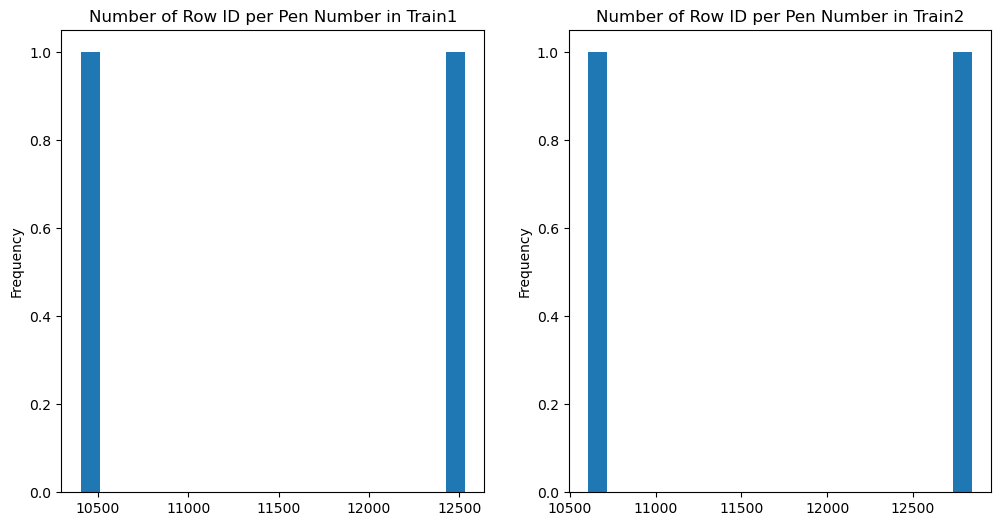

In [21]:
# show distribution of number of row_id per pen_number in train1 and train2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train1.groupby("pen_number")["row_id"].count().plot(kind="hist", bins=20)
plt.title("Number of Row ID per Pen Number in Train1")
plt.subplot(1, 2, 2)
train2.groupby("pen_number")["row_id"].count().plot(kind="hist", bins=20)
plt.title("Number of Row ID per Pen Number in Train2")
plt.show()


/opt/conda/envs/torch/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


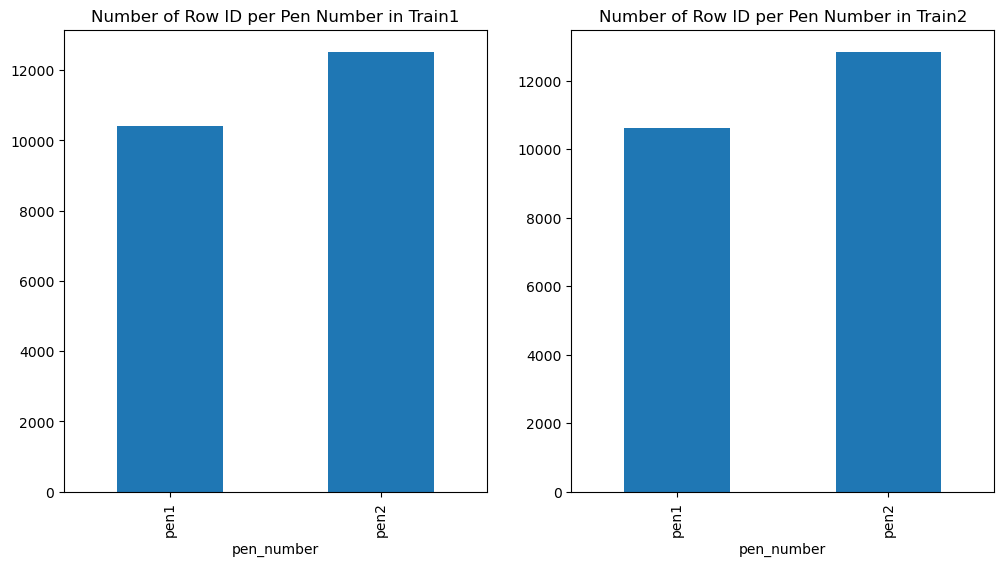

In [29]:
# show distribution of number of row_id per pen_number in train1 and train2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train1.groupby("pen_number")["row_id"].count().plot(kind="bar")
plt.title("Number of Row ID per Pen Number in Train1")
plt.subplot(1, 2, 2)
train2.groupby("pen_number")["row_id"].count().plot(kind="bar")
plt.title("Number of Row ID per Pen Number in Train2")
plt.show()



/opt/conda/envs/torch/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


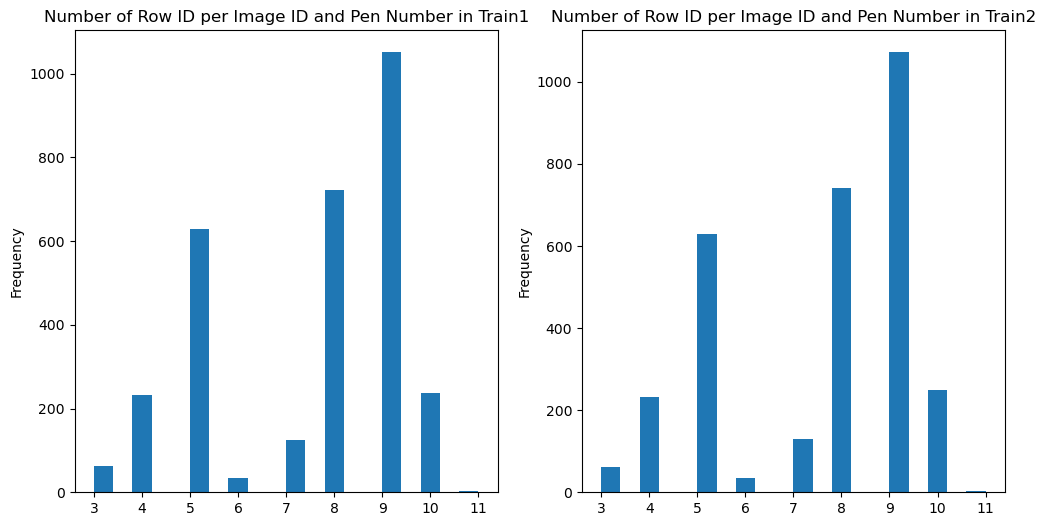

In [30]:
# show distribution of number of row_id per image_id and pen_number in train1 and train2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train1.groupby(["image_id", "pen_number"])["row_id"].count().plot(kind="hist", bins=20)
plt.title("Number of Row ID per Image ID and Pen Number in Train1")
plt.subplot(1, 2, 2)
train2.groupby(["image_id", "pen_number"])["row_id"].count().plot(kind="hist", bins=20)
plt.title("Number of Row ID per Image ID and Pen Number in Train2")
plt.show()

-> Schlussfolgerung: nach wie vor keine Ahnung, warum 